# Extracting Stock Data Using Python

This Jupyter Notebook showcases how to extract stock data using Python. We utilize the `yfinance` library to fetch stock information, along with `pandas` for data manipulation and `requests` for handling HTTP requests.


In [176]:
# Importing necessary libraries for extracting stock data
# Importing yfinance library for fetching stock data

import yfinance as yf
import yfinance as yf
import pandas as pd
import json
import requests

In [177]:
# Creating a Ticker object for Apple (AAPL) stock

apple = yf.Ticker("AAPL")

In [178]:
# Fetching additional information about Apple from a JSON file hosted online


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

In [179]:
# Checking if the request was successful (status code 200) and printing the information if available

if response.status_code == 200:
    apple_info = response.json()
    print(apple_info)
else:
    print("Failed to download the file")

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

In [180]:
# Extracting the country information from the fetched data for Apple


apple_info['country']

'United States'

### Extracting Share Price

A share represents the smallest unit of ownership in a company's stock, and its price fluctuates over time. The history() method allows us to retrieve historical share price data for a stock over a specified period. By specifying the period parameter, we can determine how far back from the present we want to retrieve data.

In [181]:
# Fetching historical share price data for Apple

apple_share_price_data = apple.history(period="max")

In [182]:
# Displaying the first few rows of the share price data for Apple

apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


"Date appears on a separate row from 'Open', 'High', 'Low', etc. Let's fix that by transposing the table a bit."

In [183]:
#Transpose the Data Frame
apple_share_price_data.head().T



Date,1980-12-12 00:00:00-05:00,1980-12-15 00:00:00-05:00,1980-12-16 00:00:00-05:00,1980-12-17 00:00:00-05:00,1980-12-18 00:00:00-05:00
Open,9.919211e-02,9.444839e-02,8.754779e-02,8.927272e-02,9.186099e-02
High,9.962335e-02,9.444839e-02,8.754779e-02,8.970397e-02,9.229224e-02
Low,9.919211e-02,9.401715e-02,8.711655e-02,8.927272e-02,9.186099e-02
Close,9.919211e-02,9.401715e-02,8.711655e-02,8.927272e-02,9.186099e-02
Volume,4.690336e+08,1.758848e+08,1.057280e+08,8.644160e+07,7.344960e+07
Dividends,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [184]:
# Resetting the index of the share price data for Apple

apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

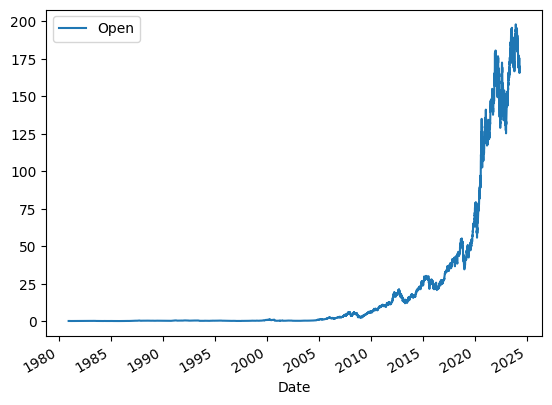

In [185]:
# Plotting the opening prices of Apple's stock over time

apple_share_price_data.plot(x="Date", y="Open")

In [186]:
# Fetching dividend information for Apple

apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
Name: Dividends, Length: 82, dtype: float64

In [187]:
dividends_df = pd.DataFrame(apple.dividends)

## Transpose the DataFrame to display "Date" and"Dividends" properly.

dividends_df = pd.DataFrame(apple.dividends).transpose()
dividends_df = pd.DataFrame(apple.dividends).T
dividends_df


Date,1987-05-11 00:00:00-04:00,1987-08-10 00:00:00-04:00,1987-11-17 00:00:00-05:00,1988-02-12 00:00:00-05:00,1988-05-16 00:00:00-04:00,1988-08-15 00:00:00-04:00,1988-11-21 00:00:00-05:00,1989-02-17 00:00:00-05:00,1989-05-22 00:00:00-04:00,1989-08-21 00:00:00-04:00,...,2021-11-05 00:00:00-04:00,2022-02-04 00:00:00-05:00,2022-05-06 00:00:00-04:00,2022-08-05 00:00:00-04:00,2022-11-04 00:00:00-04:00,2023-02-10 00:00:00-05:00,2023-05-12 00:00:00-04:00,2023-08-11 00:00:00-04:00,2023-11-10 00:00:00-05:00,2024-02-09 00:00:00-05:00
Dividends,0.000536,0.000536,0.000714,0.000714,0.000714,0.000714,0.000893,0.000893,0.000893,0.000893,...,0.22,0.22,0.23,0.23,0.23,0.23,0.24,0.24,0.24,0.24


<Axes: xlabel='Date'>

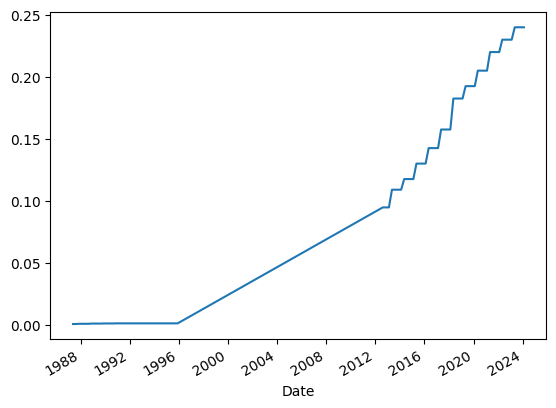

In [188]:
# Plotting the dividend payouts over time for Apple

apple.dividends.plot()

## Lets make the same but now with an other action.

In [189]:
AMD = yf.Ticker("amd")

In [190]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"
response = requests.get(url)

In [191]:
if response.status_code == 200:
    AMD_info = response.json()
    print(AMD_info)
else:
    print("Failed to download the file")

{'zip': '95054', 'sector': 'Technology', 'fullTimeEmployees': 15500, 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphics 

In [192]:
AMD_info['country']

'United States'

In [193]:
AMD_info['sector']

'Technology'

In [194]:
AMD_share_price_data = AMD.history(period="max")

In [195]:
AMD_share_price_data.head()
AMD_share_price_data.head().set_index('').T

KeyError: "None of ['Date'] are in the columns"

In [ ]:
AMD_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

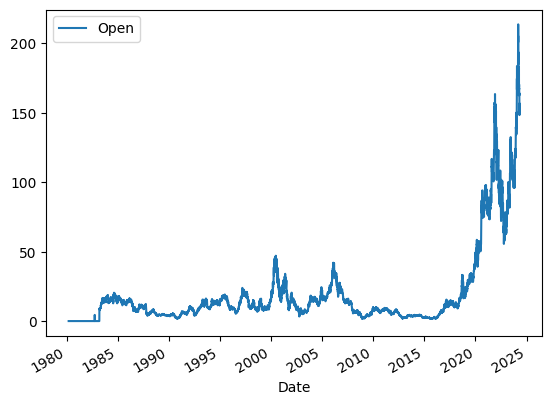

In [ ]:
AMD_share_price_data.plot(x="Date", y="Open")